In [4]:
import json
import numpy as np
import pandas as pd

In [5]:
pl = np.load("predicted_labels.npy")
tl = np.load("true_labels.npy")

In [7]:
dataset= pd.read_pickle("whole_data.pkl")
ids = json.load(open("Data/post_id_divisions.json"))
X_test=dataset[dataset['Post_id'].isin(ids['test'])]
new_ids = list(X_test["Post_id"])
ids_mc  = np.where(tl!=pl)
text_ids_mc = np.asarray(new_ids)[ids_mc]

In [38]:
dataset_details=json.load(open("Data/dataset.json"))

In [45]:
df = pd.DataFrame(columns=["text","ann labels","target","true labels","pred labels"])
all_targets = []
for i,id in enumerate(text_ids_mc):
    t = []
    for item in dataset_details[id]["annotators"]:
        t.extend(item["target"])
    new_row = {"text":dataset_details[id]["post_tokens"],"ann labels":[item["label"] for item in dataset_details[id]["annotators"]],"target":set(t), "true labels":tl[ids_mc[0][i]],"pred labels":pl[ids_mc[0][i]]}
    df = df.append(new_row,ignore_index=True)
    all_targets.extend(list(new_row["target"]))

In [52]:
counter_targets=collections.Counter(all_targets)
del counter_targets["None"]
counter_targets = counter_targets.most_common(10)

Text(0, 0.5, '# of Misclassifications')

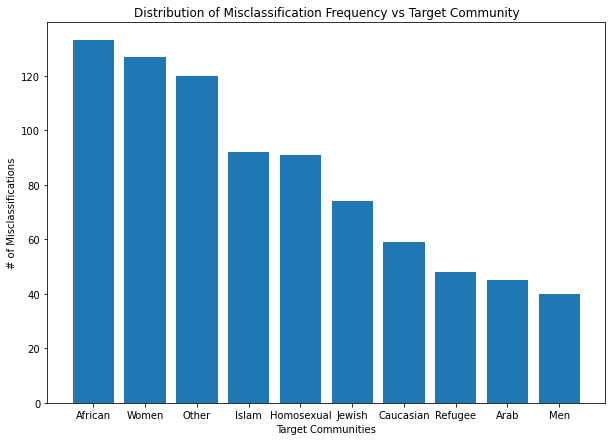

In [60]:
X = [c[0] for c in counter_targets]

Y = [c[1] for c in counter_targets]
# X = list(counter_targets.keys())
# Y = list(counter_targets.values())

fig, ax = plt.subplots(figsize=(10,7))
ax.grid(False)
ax.bar(X, Y)
plt.title('Distribution of Misclassification Frequency vs Target Community')
plt.xlabel('Target Communities')
plt.ylabel('# of Misclassifications')

In [14]:
labels_mc = tl[pl!=tl]

Text(0, 0.5, '# of Misclassifications')

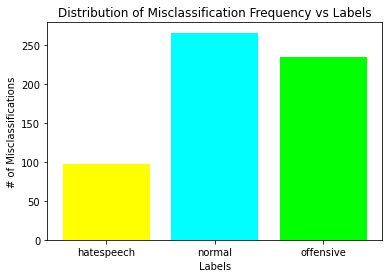

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import collections
from collections import Counter
# A = [1,1,2,3,2,1,2,2,3,1,2,2,3,3,2,1,1,2,2,3,3,3]
counter=collections.Counter(labels_mc)

label_freq_dict = {'hatespeech': counter[0], 'normal': counter[1], 'offensive': counter[2]}
if len(counter) == 3:
  colors = ['yellow', 'cyan', 'lime']
else:
  colors = ['red', 'blue']
X = list(label_freq_dict.keys())
Y = list(label_freq_dict.values())

fig, ax = plt.subplots()
ax.grid(False)
ax.bar(X, Y,color=colors)
plt.title('Distribution of Misclassification Frequency vs Labels')
plt.xlabel('Labels')
plt.ylabel('# of Misclassifications')

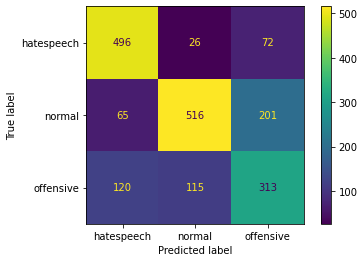

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
label_names = {0:"hatespeech",1:"normal",2:"offensive"}
tl_s = [label_names[i] for i in tl]
pl_s = [label_names[i] for i in pl]
cm = confusion_matrix(tl_s, pl_s,labels=["hatespeech","normal","offensive"])
d = ConfusionMatrixDisplay(cm,display_labels=["hatespeech","normal","offensive"])
d.plot()

Cloning into 'confusion_matrix'...


C:\Users\Sayani Kundu\Downloads\HateXplain-master\confusion_matrix


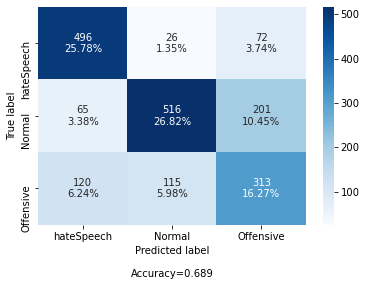

In [61]:
!git clone https://github.com/DTrimarchi10/confusion_matrix.git
%cd confusion_matrix/
from cf_matrix import *
import sklearn
import numpy as np
from sklearn.metrics import confusion_matrix
y_true = [1,2,3,2,1,2,3,2,1,1,2,2,3,3,2,2,2,1,1,2,3]
y_pred = [1,2,3,2,2,3,1,3,3,3,1,1,1,3,2,2,3,1,1,3,3]
cm = confusion_matrix(tl, pl)
categories = ['hateSpeech','Normal', "Offensive"]

make_confusion_matrix(cm, categories=categories)